In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

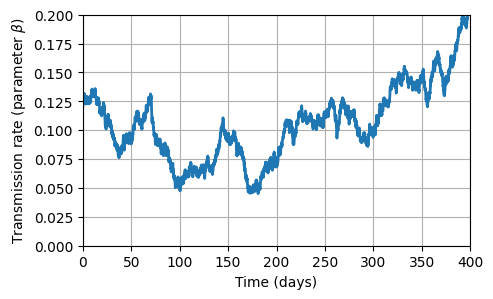

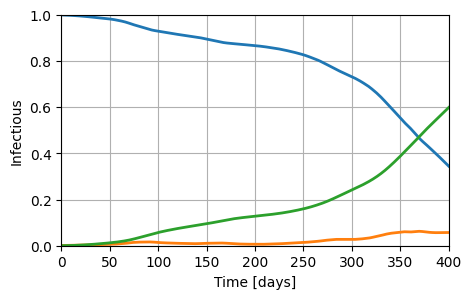

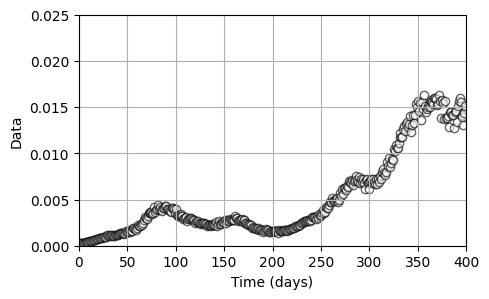

In [ ]:
Ndays = 400
tdata = np.arange(0,Ndays)
sampFac = 10 # sample every sampFac time step
dt = 1/10 # timestep
tgrd = 10*Ndays # time integration grid
tlist = np.zeros((1,tgrd))
tlist[0,:]  = np.linspace(0,Ndays,tgrd) # Define time axis

gamma = 1/14


Ytrue = np.zeros((3,tgrd))
I0 = 0.001

R0 = 0
S0 = 1 - I0 - R0

Ytrue[:,0] = [S0,I0,R0]

beta = np.zeros((1,tgrd))
beta[0,0] = 0.12#0.096

np.random.seed(123)
skip = np.random.normal(0,1,55)

for kk in range(1,tgrd):
  Ytrue[0,kk] = Ytrue[0,kk-1] + dt*(-beta[0,kk-1]*Ytrue[0,kk-1]*Ytrue[1,kk-1]) #- np.sqrt(dt)*0*np.random.normal(0,1)
  Ytrue[1,kk] = Ytrue[1,kk-1] + dt*(beta[0,kk-1]*Ytrue[0,kk-1]*Ytrue[1,kk-1] - gamma*Ytrue[1,kk-1])
  Ytrue[2,kk] = Ytrue[2,kk-1] + dt*(gamma*Ytrue[1,kk-1])
  beta[0,kk] = beta[0,kk-1] + 0.005*np.sqrt(dt)*np.random.normal(0,1)

epsilon =0.05
Ynoisy = Ytrue[1,0:]*(1 + epsilon*np.random.normal(0,1,tgrd))
tobs = tlist[0,0::sampFac]
Yobs = 0.25*Ynoisy[0::sampFac]


true = np.concatenate((Ytrue,beta))
true = np.concatenate((true,tlist))


np.savetxt('Case00/true.dat',true)
np.savetxt('Case00/data.dat',Yobs)
np.savetxt('Case00/timedata.dat',tobs)


f, ax = plt.subplots(1, figsize=(5,3))#15,3
plt.plot(tlist[0,:],beta[0,:],linewidth=2,c='tab:blue',zorder=2)
# plt.plot([10,10],[-100,100],'k:',linewidth=1.5)
plt.grid(True)
plt.xlim([0,Ndays])
plt.ylim([0,0.2])
plt.xlabel('Time (days)', fontsize=10)
plt.ylabel(r'Transmission rate (parameter $\beta$)', fontsize=10)
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), fancybox=True, shadow=True, ncol=3, fontsize=12)
plt.savefig('Case00/figures/beta.pdf',bbox_inches='tight')


f, ax = plt.subplots(1, figsize=(5,3))
plt.plot(tlist[0,:],Ytrue[0,:],linewidth=2)
plt.plot(tlist[0,:],Ytrue[1,:],linewidth=2)
plt.plot(tlist[0,:],Ytrue[2,:],linewidth=2)
# plt.plot([10,10],[-100,100],'k:',linewidth=1.5)
plt.grid(True)
plt.xlim([0,Ndays])
plt.ylim([0,1])
plt.xlabel('Time [days]', fontsize=10)
plt.ylabel('Infectious', fontsize=10)
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), fancybox=True, shadow=True, ncol=3, fontsize=12)
plt.savefig('Case00/figures/sir.pdf',bbox_inches='tight')

f, ax = plt.subplots(1, figsize=(5,3))
plt.scatter(tobs,Yobs,color='w',edgecolors='k',zorder=1,alpha=0.6,label='Data')
# plt.plot([10,10],[-100,100],'k:',linewidth=1.5)
plt.grid(True)
plt.xlim([0,Ndays])
plt.ylim([0,0.025])
plt.xlabel('Time (days)', fontsize=10)
plt.ylabel('Data', fontsize=10)
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), fancybox=True, shadow=True, ncol=3, fontsize=12)
plt.savefig('Case00/figures/data.pdf',bbox_inches='tight')



0.13031088913245537


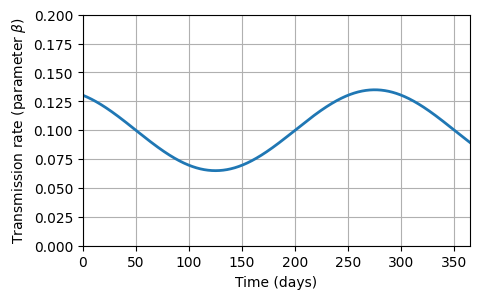

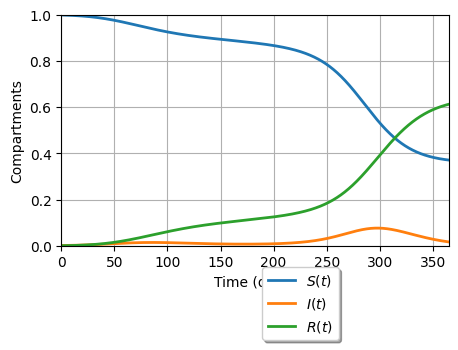

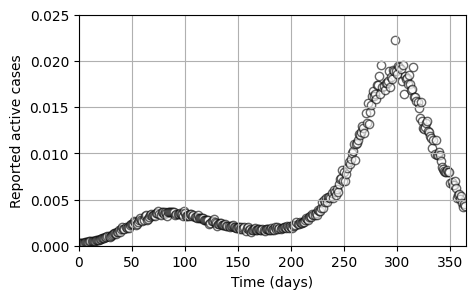

In [ ]:
Ndays = 365
tdata = np.arange(0,Ndays)
sampFac = 10 # sample every sampFac time step
dt = 1/10 # timestep
tgrd = 10*Ndays # time integration grid
tlist = np.zeros((1,tgrd))
tlist[0,:]  = np.linspace(0,Ndays,tgrd) # Define time axis

gamma = 1/14


Ytrue = np.zeros((3,tgrd))
I0 = 0.001  #11117737

R0 = 0
S0 = 1 - I0 - R0

Ytrue[:,0] = [S0,I0,R0]

a0 =  0.1
a1 =  0.035

beta = np.zeros((1,tgrd))
beta[0,:] = a0 + a1*np.cos(2*np.pi*(tlist+25)/300)
print(beta[0,0])

np.random.seed(101)

for kk in range(1,tgrd):
  Ytrue[0,kk] = Ytrue[0,kk-1] + dt*(-beta[0,kk-1]*Ytrue[0,kk-1]*Ytrue[1,kk-1]) #- np.sqrt(dt)*0*np.random.normal(0,1)
  Ytrue[1,kk] = Ytrue[1,kk-1] + dt*(beta[0,kk-1]*Ytrue[0,kk-1]*Ytrue[1,kk-1] - gamma*Ytrue[1,kk-1])
  Ytrue[2,kk] = Ytrue[2,kk-1] + dt*(gamma*Ytrue[1,kk-1])

epsilon =0.05
Ynoisy = Ytrue[1,0:]*(1 + epsilon*np.random.normal(0,1,tgrd))
Yobs = 0.25*Ynoisy[0::sampFac]
tobs = tlist[0,0::sampFac]
2
infectious_1 = Ytrue[2,:]


true = np.concatenate((Ytrue,beta))
true = np.concatenate((true,tlist))


np.savetxt('Case01/true.dat',true)
np.savetxt('Case01/data.dat',Yobs)
np.savetxt('Case01/timedata.dat',tobs)


f, ax = plt.subplots(1, figsize=(5,3))#15,3
plt.plot(tlist[0,:],beta[0,:],linewidth=2,c='tab:blue',zorder=2)
# plt.plot([10,10],[-100,100],'k:',linewidth=1.5)
plt.grid(True)
plt.xlim([0,Ndays])
plt.ylim([0,0.2])
plt.xlabel('Time (days)', fontsize=10)
plt.ylabel(r'Transmission rate (parameter $\beta$)', fontsize=10)
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), fancybox=True, shadow=True, ncol=3, fontsize=12)
plt.savefig('Case01/figures/beta.pdf',bbox_inches='tight')


f, ax = plt.subplots(1, figsize=(5,3))
plt.plot(tlist[0,:],Ytrue[0,:],linewidth=2,label=r'$S(t)$')
plt.plot(tlist[0,:],Ytrue[1,:],linewidth=2,label=r'$I(t)$')
plt.plot(tlist[0,:],Ytrue[2,:],linewidth=2,label=r'$R(t)$')
# plt.plot([10,10],[-100,100],'k:',linewidth=1.5)
plt.grid(True)
plt.xlim([0,Ndays])
plt.ylim([0,1])
plt.xlabel('Time (days)', fontsize=10)
plt.ylabel('Compartments', fontsize=10)
ax.legend(loc='center left', bbox_to_anchor=(0.5, -0.25), fancybox=True, shadow=True, ncol=1, fontsize=10)
plt.savefig('Case01/figures/sir.pdf',bbox_inches='tight')


f, ax = plt.subplots(1, figsize=(5,3))
plt.scatter(tobs,Yobs,color='w',edgecolors='k',zorder=1,alpha=0.6,label='Data')
# plt.plot(tlist[0,:],Ytrue[1,:],linewidth=2,c='tab:blue',zorder=2,label='Infectious')
# plt.plot(tlist,Ytrue[1,:],linewidth=2,c='tab:red',zorder=3,label='Exposed')
# plt.plot([10,10],[-100,100],'k:',linewidth=1.5)
plt.grid(True)
plt.xlim([0,Ndays])
plt.ylim([0,0.025])
plt.xlabel('Time (days)', fontsize=10)
plt.ylabel('Reported active cases', fontsize=10)
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), fancybox=True, shadow=True, ncol=3, fontsize=12)
plt.savefig('Case01/figures/data.pdf',bbox_inches='tight')


0.12503013899569274


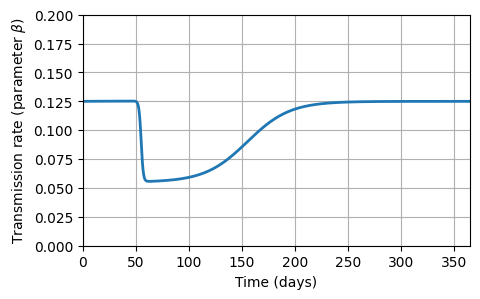

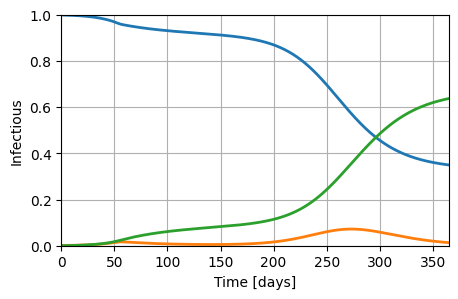

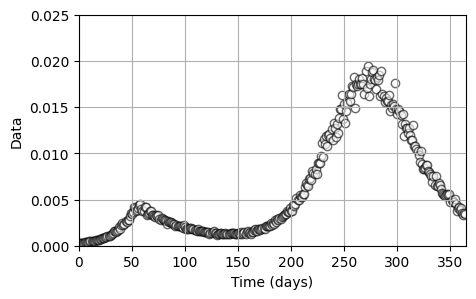

In [ ]:
Ndays = 365
tdata = np.arange(0,Ndays)
sampFac = 10 # sample every sampFac time step
dt = 1/10 # timestep
tgrd = 10*Ndays # time integration grid
tlist = np.zeros((1,tgrd))
tlist[0,:]  = np.linspace(0,Ndays,tgrd) # Define time axis

gamma = 1/14


Ytrue = np.zeros((3,tgrd))
I0 = 0.001

R0 = 0
S0 = 1 - I0 - R0

Ytrue[:,0] = [S0,I0,R0]

beta = np.zeros((1,tgrd))
beta[0,:] = 0.125 - 0.07*(1/(1+np.exp(-tlist + 55)) - 1/(1+np.exp(-(tlist - 155)/20)))

print(beta[0,0])
np.random.seed(101)

for kk in range(1,tgrd):
  Ytrue[0,kk] = Ytrue[0,kk-1] + dt*(-beta[0,kk-1]*Ytrue[0,kk-1]*Ytrue[1,kk-1]) #- np.sqrt(dt)*0*np.random.normal(0,1)
  Ytrue[1,kk] = Ytrue[1,kk-1] + dt*(beta[0,kk-1]*Ytrue[0,kk-1]*Ytrue[1,kk-1] - gamma*Ytrue[1,kk-1])
  Ytrue[2,kk] = Ytrue[2,kk-1] + dt*(gamma*Ytrue[1,kk-1])



epsilon =0.05
Ynoisy = Ytrue[1,0:]*(1 + epsilon*np.random.normal(0,1,tgrd))
Yobs = 0.25*Ynoisy[0::sampFac]

# Dtrue = beta[0,0:]*Ytrue[1,0:]*Ytrue[0,0:]
# tobs = tlist[0,0::sampFac]
# for ii in range(Ndays):
#   Yobs[ii] = np.sum(Dtrue[ii*sampFac:(ii+1)*sampFac])*(1 + epsilon*np.random.normal(0,1))


true = np.concatenate((Ytrue,beta))
true = np.concatenate((true,tlist))

np.savetxt('Case02/true.dat',true)
np.savetxt('Case02/data.dat',Yobs)
np.savetxt('Case02/timedata.dat',tobs)

f, ax = plt.subplots(1, figsize=(5,3))#15,3
plt.plot(tlist[0,:],beta[0,:],linewidth=2,c='tab:blue',zorder=2)
# plt.plot([10,10],[-100,100],'k:',linewidth=1.5)
plt.grid(True)
plt.xlim([0,Ndays])
plt.ylim([0,0.2])
plt.xlabel('Time (days)', fontsize=10)
plt.ylabel(r'Transmission rate (parameter $\beta$)', fontsize=10)
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), fancybox=True, shadow=True, ncol=3, fontsize=12)
plt.savefig('Case02/figures/beta.pdf',bbox_inches='tight')


f, ax = plt.subplots(1, figsize=(5,3))
plt.plot(tlist[0,:],Ytrue[0,:],linewidth=2)
plt.plot(tlist[0,:],Ytrue[1,:],linewidth=2)
plt.plot(tlist[0,:],Ytrue[2,:],linewidth=2)
# plt.plot([10,10],[-100,100],'k:',linewidth=1.5)
plt.grid(True)
plt.xlim([0,Ndays])
plt.ylim([0,1])
plt.xlabel('Time [days]', fontsize=10)
plt.ylabel('Infectious', fontsize=10)
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), fancybox=True, shadow=True, ncol=3, fontsize=12)
plt.savefig('Case02/figures/beta.pdf',bbox_inches='tight')


f, ax = plt.subplots(1, figsize=(5,3))
plt.scatter(tobs,Yobs,color='w',edgecolors='k',zorder=1,alpha=0.6,label='Data')
# plt.plot([10,10],[-100,100],'k:',linewidth=1.5)
plt.grid(True)
plt.xlim([0,Ndays])
plt.ylim([0,0.025])
plt.xlabel('Time (days)', fontsize=10)
plt.ylabel('Data', fontsize=10)
# ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), fancybox=True, shadow=True, ncol=3, fontsize=12)
plt.savefig('Case02/figures/data.pdf',bbox_inches='tight')

